# MNIST

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
import scipy

%matplotlib inline

### Dataset description

Datasource: http://yann.lecun.com/exdb/mnist/

The training dataset consists of 60,000 training digits and the test set contains 10,000 samples, respectively. The images in the MNIST dataset consist of  pixels, and each pixel is represented by a gray scale intensity value. Here, we unroll the  pixels into 1D row vectors, which represent the rows in our image array (784 per row or image). The second array (labels) returned by the load_mnist function contains the corresponding target variable, the class labels (integers 0-9) of the handwritten digits.


Csv version of the files are available in the following links.
CSV training set http://www.pjreddie.com/media/files/mnist_train.csv
CSV test set http://www.pjreddie.com/media/files/mnist_test.csv


In [48]:
training = pd.read_csv("/data/MNIST/mnist_train.csv", header = None).sample(5000)

In [49]:
X_train = training.iloc[:, 1:].values/255
y_train = training.iloc[:, 0]

In [50]:
X_train.shape

(5000, 784)

In [51]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [52]:
pca = decomposition.PCA(n_components=2, random_state=1)
X_train_pca = pca.fit_transform(X_train_std)

In [53]:
X_train_pca.shape

(5000, 2)

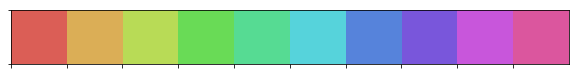

In [54]:
import seaborn as sns
colors = sns.color_palette("hls", 10)
sns.palplot(colors)

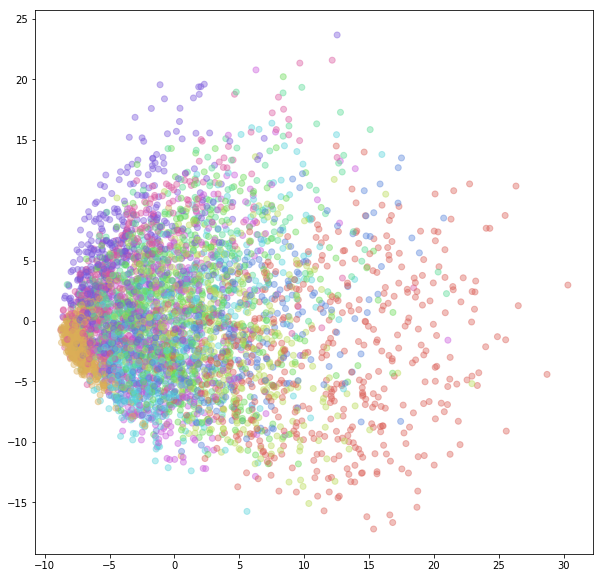

In [55]:
colors = np.array(colors)[y_train]
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], color = colors, alpha = 0.4)

In [57]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_train)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.155s...
[t-SNE] Computed neighbors for 5000 samples in 24.494s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.320348
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.052223
[t-SNE] KL divergence after 300 iterations: 2.117558
CPU times: user 41 s, sys: 512 ms, total: 41.5 s
Wall time: 38.8 s


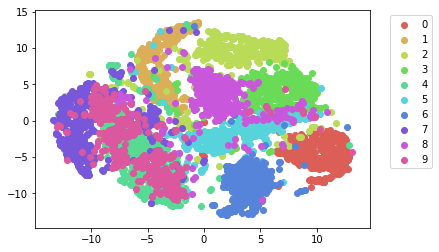

In [80]:
colors = sns.color_palette("hls", 10)
fig, ax = plt.subplots()

for i in range(10):
    gr = tsne_results[y_train == i]
    ax.scatter(gr[:, 0], gr[:, 1], color = colors[i], label = i)
plt.legend(bbox_to_anchor = (1.2, 1))